In [ ]:
# Load Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [ ]:
# Load the datasets
lap_times = pd.read_csv("/content/drive/MyDrive/Projects @ UIUC/F1 Project/Data/lap_times.csv")
results = pd.read_csv("/content/drive/MyDrive/Projects @ UIUC/F1 Project/Data/results.csv")

# Merge datasets on 'raceId' and 'driverId'
merged_data = pd.merge(
    lap_times,
    results[['raceId', 'driverId', 'positionOrder', 'fastestLapTime']],
    on=['raceId', 'driverId'],
    how='left'
)

# Preview the merged data
print(merged_data.head())


   raceId  driverId  lap  position      time  milliseconds  positionOrder  \
0     841        20    1         1  1:38.109         98109              1   
1     841        20    2         1  1:33.006         93006              1   
2     841        20    3         1  1:32.713         92713              1   
3     841        20    4         1  1:32.803         92803              1   
4     841        20    5         1  1:32.342         92342              1   

  fastestLapTime  
0       1:29.844  
1       1:29.844  
2       1:29.844  
3       1:29.844  
4       1:29.844  


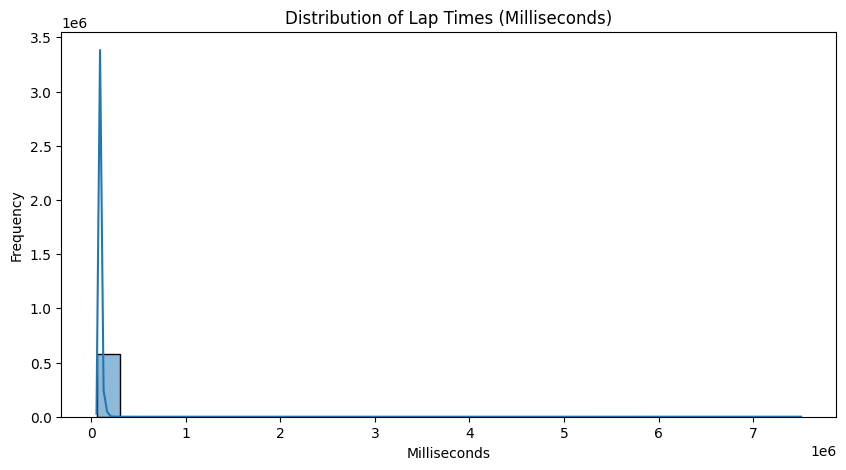

Top 5 Most Consistent Drivers:
     driverId  LapTime_StdDev
71         72     2630.987259
84         86     5624.838080
44         45    10387.376015
131       851    10585.355655
35         36    11069.370583


In [ ]:
# 1. Distribution of Lap Times
plt.figure(figsize=(10, 5))
sns.histplot(merged_data['milliseconds'], bins=30, kde=True)
plt.title('Distribution of Lap Times (Milliseconds)')
plt.xlabel('Milliseconds')
plt.ylabel('Frequency')
plt.show()

# 2. Driver Consistency Analysis - Calculate Std Dev of Lap Times for Each Driver
driver_consistency = merged_data.groupby('driverId')['milliseconds'].std().reset_index()
driver_consistency.columns = ['driverId', 'LapTime_StdDev']

# Display Top 5 Most Consistent Drivers (Lowest StdDev)
top_consistent_drivers = driver_consistency.sort_values(by='LapTime_StdDev').head()
print("Top 5 Most Consistent Drivers:")
print(top_consistent_drivers)

Top 5 Circuits with Fastest Average Lap Times:
    circuitId   Avg_LapTime
32         70  74218.468968
18         19  78880.697202
7           8  81948.936197
17         18  84886.007861
35         75  85383.201027


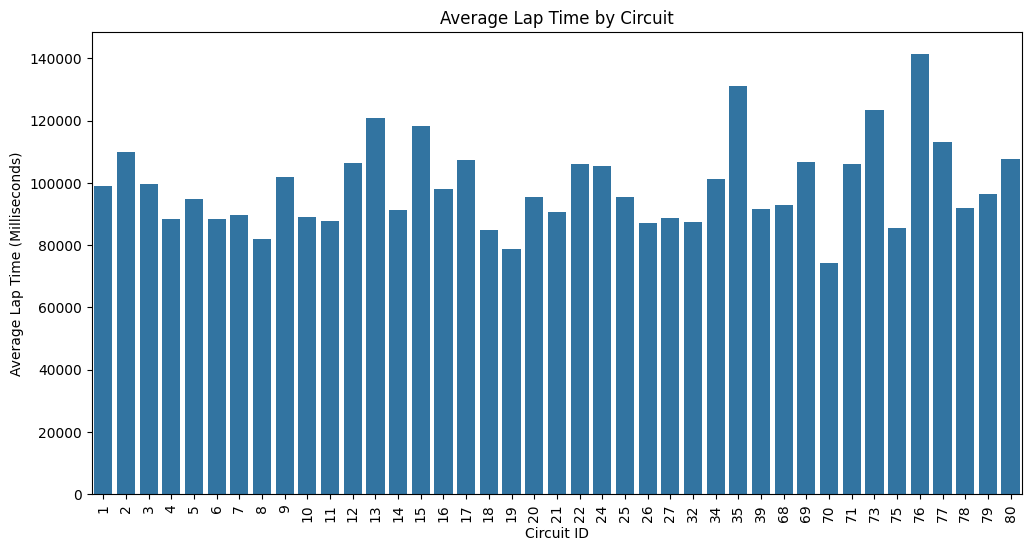

In [ ]:
# Load the races dataset to link raceId with circuitId
races = pd.read_csv("/content/drive/MyDrive/Projects @ UIUC/F1 Project/Data/races.csv")[['raceId', 'circuitId']]

# Merge the merged_data with races to add circuit details
results_with_circuits = pd.merge(merged_data, races, on='raceId', how='left')

# Calculate the average lap time per circuit
circuit_performance = results_with_circuits.groupby('circuitId')['milliseconds'].mean().reset_index()
circuit_performance.columns = ['circuitId', 'Avg_LapTime']

# Display the Top 5 Circuits with the Fastest Average Lap Times
top_circuits = circuit_performance.sort_values(by='Avg_LapTime').head()
print("Top 5 Circuits with Fastest Average Lap Times:")
print(top_circuits)

# Visualize Circuit Performance
plt.figure(figsize=(12, 6))
sns.barplot(data=circuit_performance, x='circuitId', y='Avg_LapTime')
plt.xticks(rotation=90)
plt.title('Average Lap Time by Circuit')
plt.xlabel('Circuit ID')
plt.ylabel('Average Lap Time (Milliseconds)')
plt.show()


In [ ]:
# 1. Summarize Circuit Performance Insights
print("Summary of Circuit Performance:")
print(top_circuits)

# Insights: Identify which circuits tend to have the fastest lap times.
fastest_circuit = top_circuits.iloc[0]
print(f"\nThe fastest circuit is Circuit ID: {fastest_circuit['circuitId']} "
      f"with an average lap time of {fastest_circuit['Avg_LapTime']} milliseconds.")

# 2. Identify Consistent Drivers (Previously Calculated in EDA)
print("\nTop 5 Most Consistent Drivers (Based on Lap Time Std Dev):")
print(top_consistent_drivers)

# 3. Provide Strategic Recommendations
print("\nStrategic Recommendations:")
print("""
1. Focus on Circuit-Specific Preparation:
   - Optimize race strategies for circuits with lower average lap times.
   - Prioritize consistent drivers for circuits where performance is predictable.

2. Driver Selection:
   - Use drivers with the lowest lap time standard deviation for critical races requiring precision.
   - Leverage aggressive drivers (those with the fastest average lap times) for circuits favoring speed.

3. Pit-Stop Strategy:
   - Use lap time patterns to plan pit stops during races.
   - Identify races where minimal pit stops are possible based on low lap time variability.

4. Performance Tracking:
   - Monitor drivers with improving lap times over multiple races for potential future performance.
   - Develop circuit-specific training programs to enhance driver performance.
""")


Summary of Circuit Performance:
    circuitId   Avg_LapTime
32         70  74218.468968
18         19  78880.697202
7           8  81948.936197
17         18  84886.007861
35         75  85383.201027

The fastest circuit is Circuit ID: 70.0 with an average lap time of 74218.46896803504 milliseconds.

Top 5 Most Consistent Drivers (Based on Lap Time Std Dev):
     driverId  LapTime_StdDev
71         72     2630.987259
84         86     5624.838080
44         45    10387.376015
131       851    10585.355655
35         36    11069.370583

Strategic Recommendations:

1. Focus on Circuit-Specific Preparation:
   - Optimize race strategies for circuits with lower average lap times.
   - Prioritize consistent drivers for circuits where performance is predictable.

2. Driver Selection:
   - Use drivers with the lowest lap time standard deviation for critical races requiring precision.
   - Leverage aggressive drivers (those with the fastest average lap times) for circuits favoring speed.

3. P